# Wine quality
## Задача класифікації

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Зчитування датасету

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red_y = red.quality
red_x = red.drop('quality', axis=1)

white_y = white.quality
white_x = white.drop('quality', axis=1)

red.shape, white.shape

((1599, 12), (4898, 12))

In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Розподіл оцінок вина

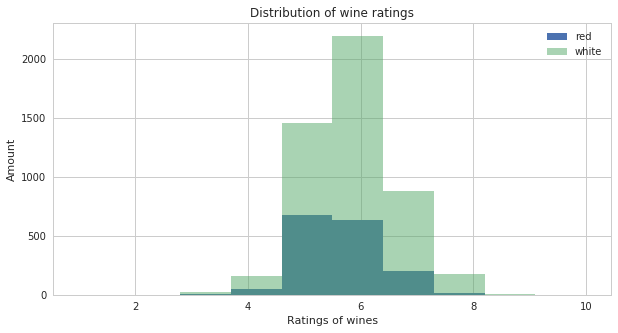

In [5]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(red_y, range=(1, 10), label='red')
plt.hist(white_y, range=(1, 10), alpha=0.5, label='white')

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.legend(loc='upper right')
plt.show()

### Будемо оцінювати вино як хороше або погане, тобто > 6 або <= 6

In [6]:
red_y = [1 if x > 6 else 0 for x in red_y]
white_y = [1 if x > 6 else 0 for x in white_y]

red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(red_x, red_y, test_size=0.2)
white_x_train, white_x_test, white_y_train, white_y_test = train_test_split(white_x, white_y, test_size=0.2)

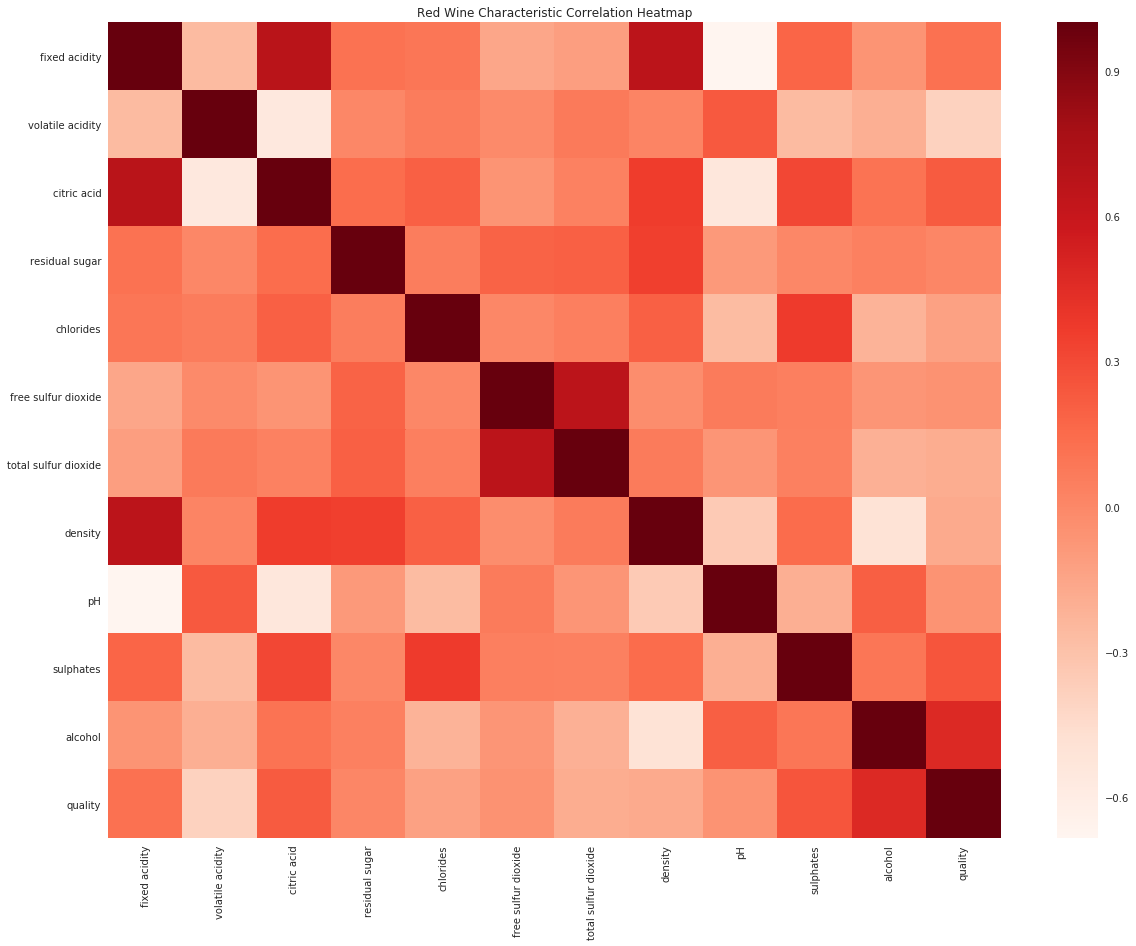

In [7]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Red Wine Characteristic Correlation Heatmap")
corr = red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

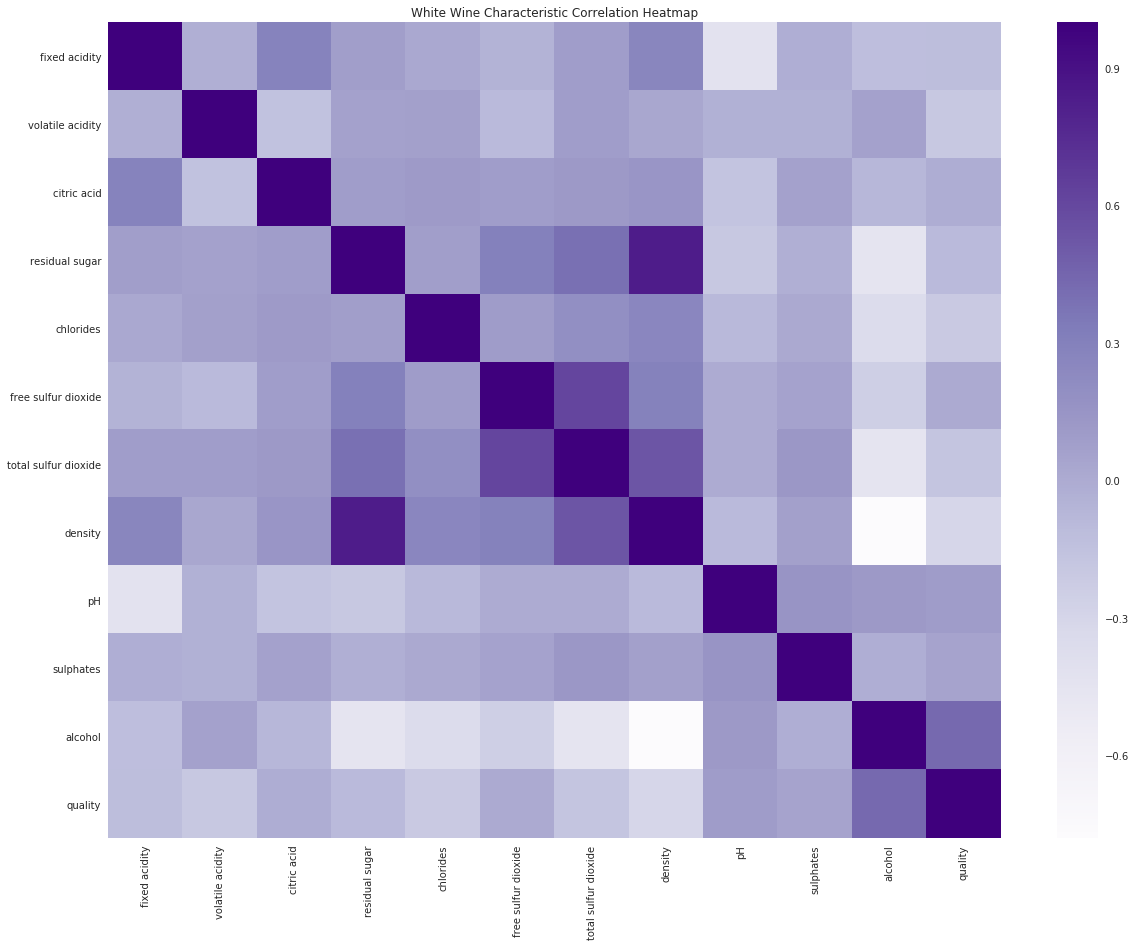

In [8]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("White Wine Characteristic Correlation Heatmap")
corr = white.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")

## Для вирішення цієї задачі обрали Decision Tree та Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

# Decision Tree

Red wine:  0.86875 
White wine: 0.8040816326530612


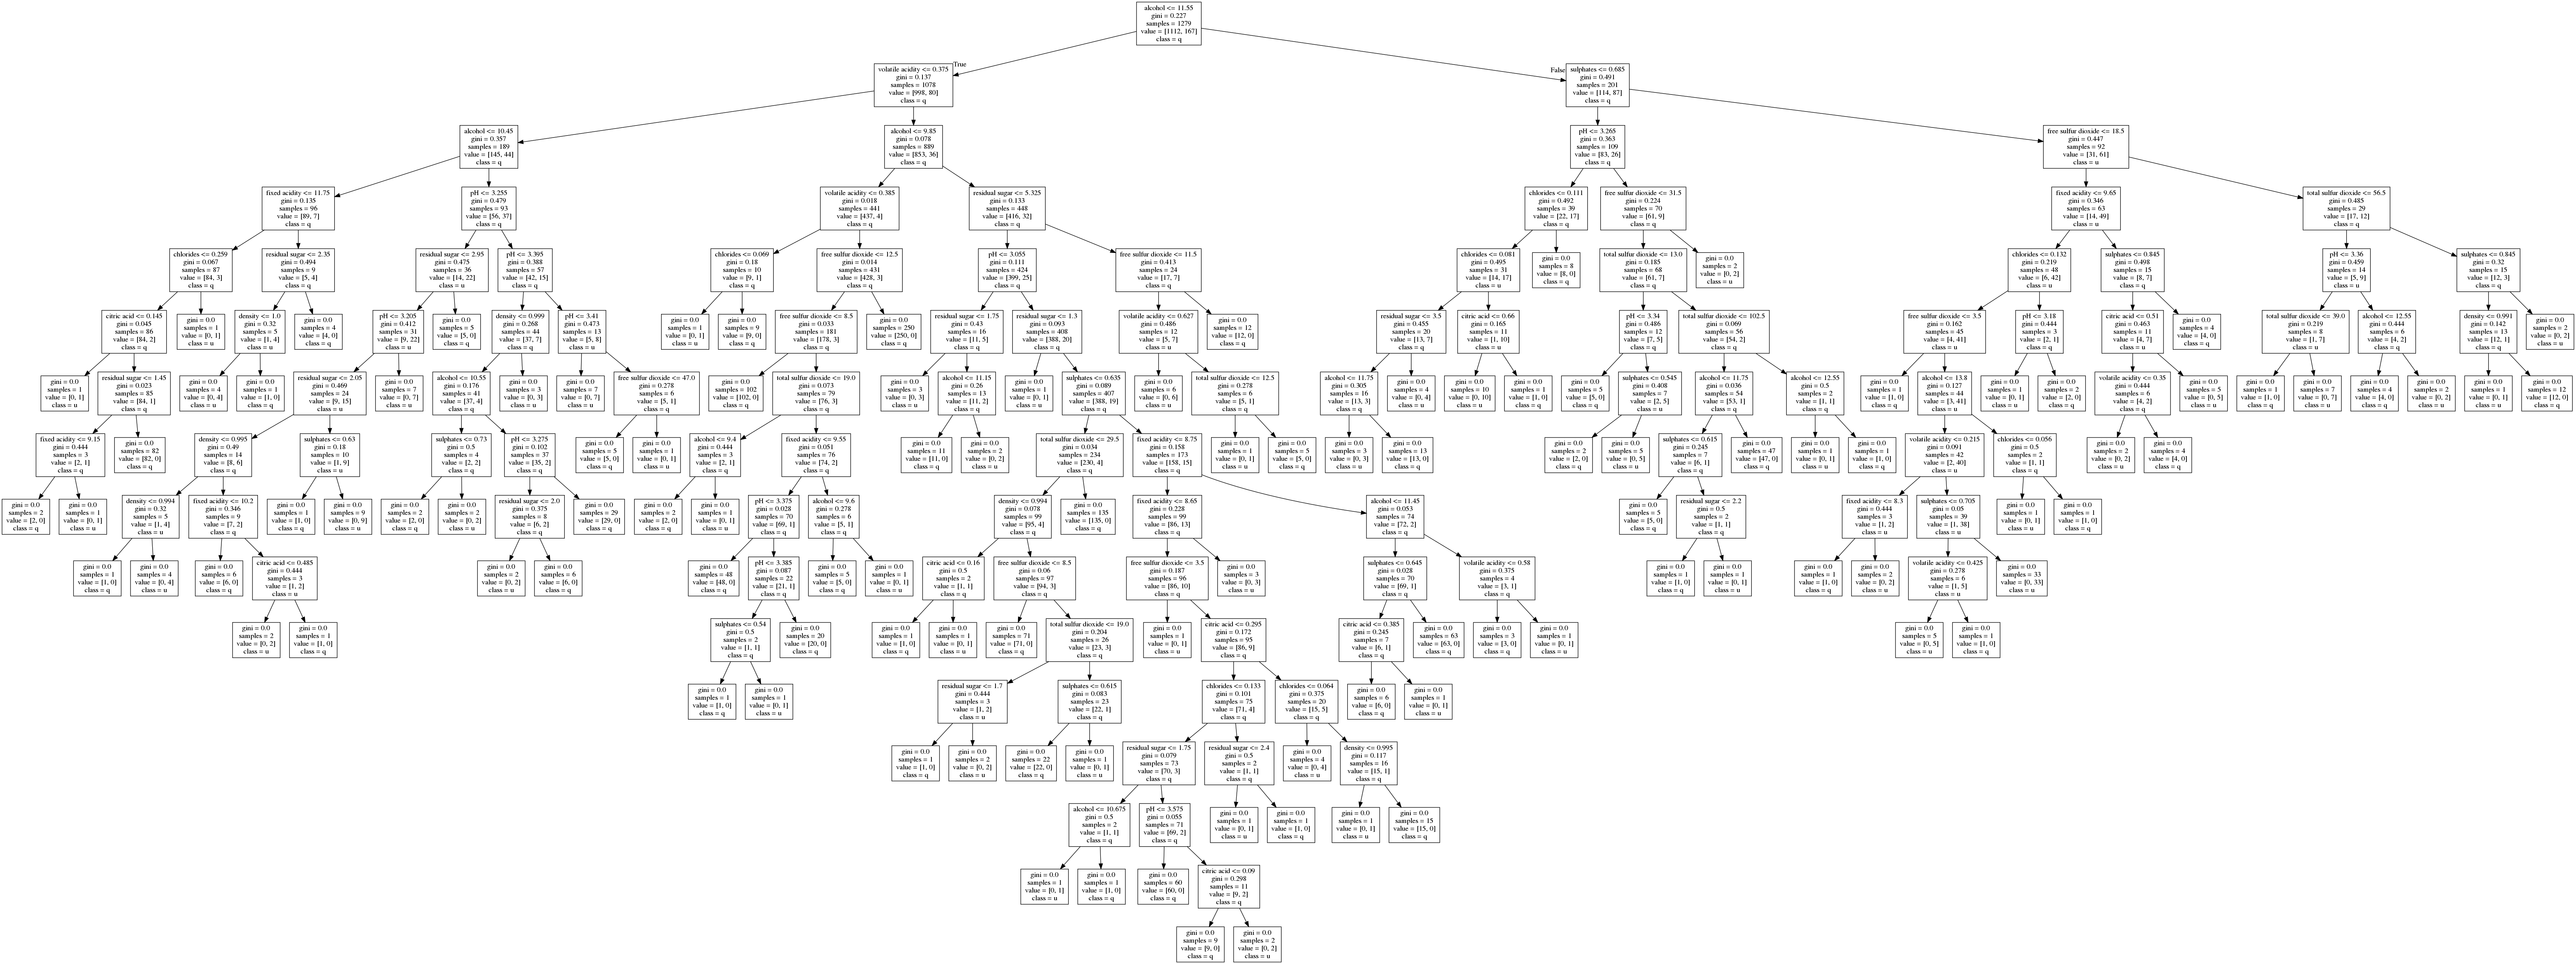

In [33]:
clf = tree.DecisionTreeClassifier()

clf.fit(red_x_train, red_y_train)
red_confidence = clf.score(red_x_test, red_y_test)

import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=red_x.columns.values,  
                                class_names='quality')

graph = pydotplus.graph_from_dot_data(dot_data)  
               
clf.fit(white_x_train, white_y_train)
white_confidence = clf.score(white_x_test, white_y_test)

print('Red wine: ', red_confidence,
      '\nWhite wine:', white_confidence)

Image(graph.create_png())

# Random Forest

In [11]:
r_scores = []
w_scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    r_scores.append(cross_val_score(clf, red_x, red_y, cv=10))
    w_scores.append(cross_val_score(clf, white_x, white_y, cv=10))

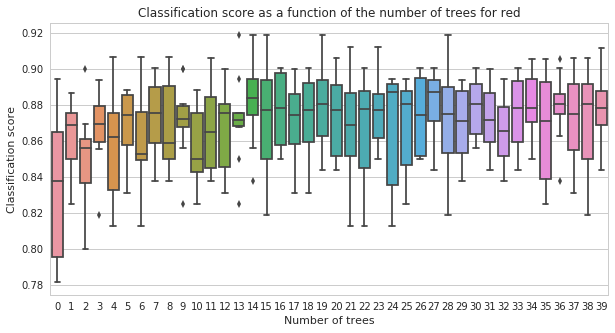

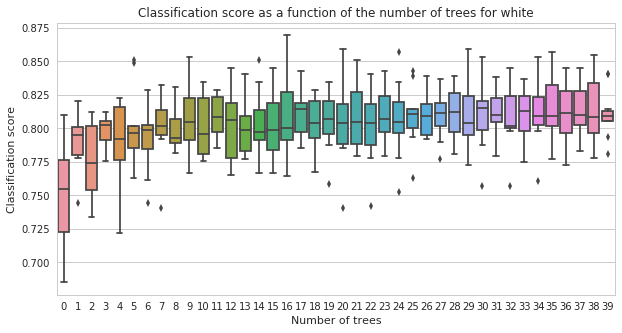

In [12]:
sns.boxplot(data=r_scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees for red')
plt.show()

sns.boxplot(data=w_scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees for white')
plt.show()

In [13]:
good_red = sum(red_y)  / len(red_y)
bad_red = 1 - good_red
print('Ratio of good red wine: ', good_red)
print('Ratio of bad red wine: ', bad_red)

good_white = sum(white_y)  / len(white_y)
bad_white = 1 - good_white
print('\nRatio of good white wine: ', good_white)
print('Ratio of bad white wine: ', bad_white)

Ratio of good red wine:  0.1357098186366479
Ratio of bad red wine:  0.8642901813633521

Ratio of good white wine:  0.21641486320947326
Ratio of bad white wine:  0.7835851367905268


In [35]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(red_x_train, red_y_train)
red_score = clf.score(red_x_test, red_y_test)

clf = RandomForestClassifier(n_estimators=29)
clf.fit(white_x_train, white_y_train)
white_score = clf.score(white_x_test, white_y_test)

red_score, white_score

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = red_x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
alcohol,0.147866
density,0.118389
chlorides,0.092023
residual sugar,0.091513
pH,0.086597
volatile acidity,0.085806
free sulfur dioxide,0.084396
total sulfur dioxide,0.082883
sulphates,0.075480
fixed acidity,0.070061
